Link to the prompt: https://github.com/minerva-university/cs156/tree/master/session03
resource: https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

In [182]:
import pandas as pd
import seaborn as sns
import numpy as np
facebook= pd.read_csv("/Users/swimmingcircle/cs156_code/session03/facebook_train.csv")
casualty =  pd.read_csv("/Users/swimmingcircle/cs156_code/session03/casualty_train.csv")

## Regression Model 

In [183]:
facebook.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
0,124050,Photo,3,6,4,17,1,3,77,16
1,132556,Photo,2,8,3,24,0,11,313,50
2,92786,Photo,2,2,6,17,1,2,145,39
3,135632,Photo,1,9,2,1,0,2,299,49
4,139540,Link,1,12,3,17,1,7,229,21


In [184]:
facebook.describe()

,total_followers,category,month,weekday,hour,paid,comment,like,share
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,123455.692695,1.858942,7.098237,3.929471,14.133501,0.287154,9.526448,224.375315,33.405542
std,16402.091050,0.855908,3.324674,1.963059,8.243137,0.453005,28.151510,413.538821,54.912182
min,80051.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,113590.000000,1.000000,4.000000,2.000000,3.000000,0.000000,1.000000,69.000000,12.000000
50%,129944.000000,2.000000,7.000000,4.000000,17.000000,0.000000,3.000000,124.000000,23.000000
75%,136458.000000,3.000000,10.000000,6.000000,20.000000,1.000000,8.000000,234.000000,39.000000
max,139942.000000,3.000000,12.000000,7.000000,24.000000,1.000000,441.000000,6039.000000,926.000000


In [185]:
facebook.dtypes

total_followers     int64
type               object
category            int64
month               int64
weekday             int64
hour                int64
paid                int64
comment             int64
like                int64
share               int64
dtype: object

### EDA

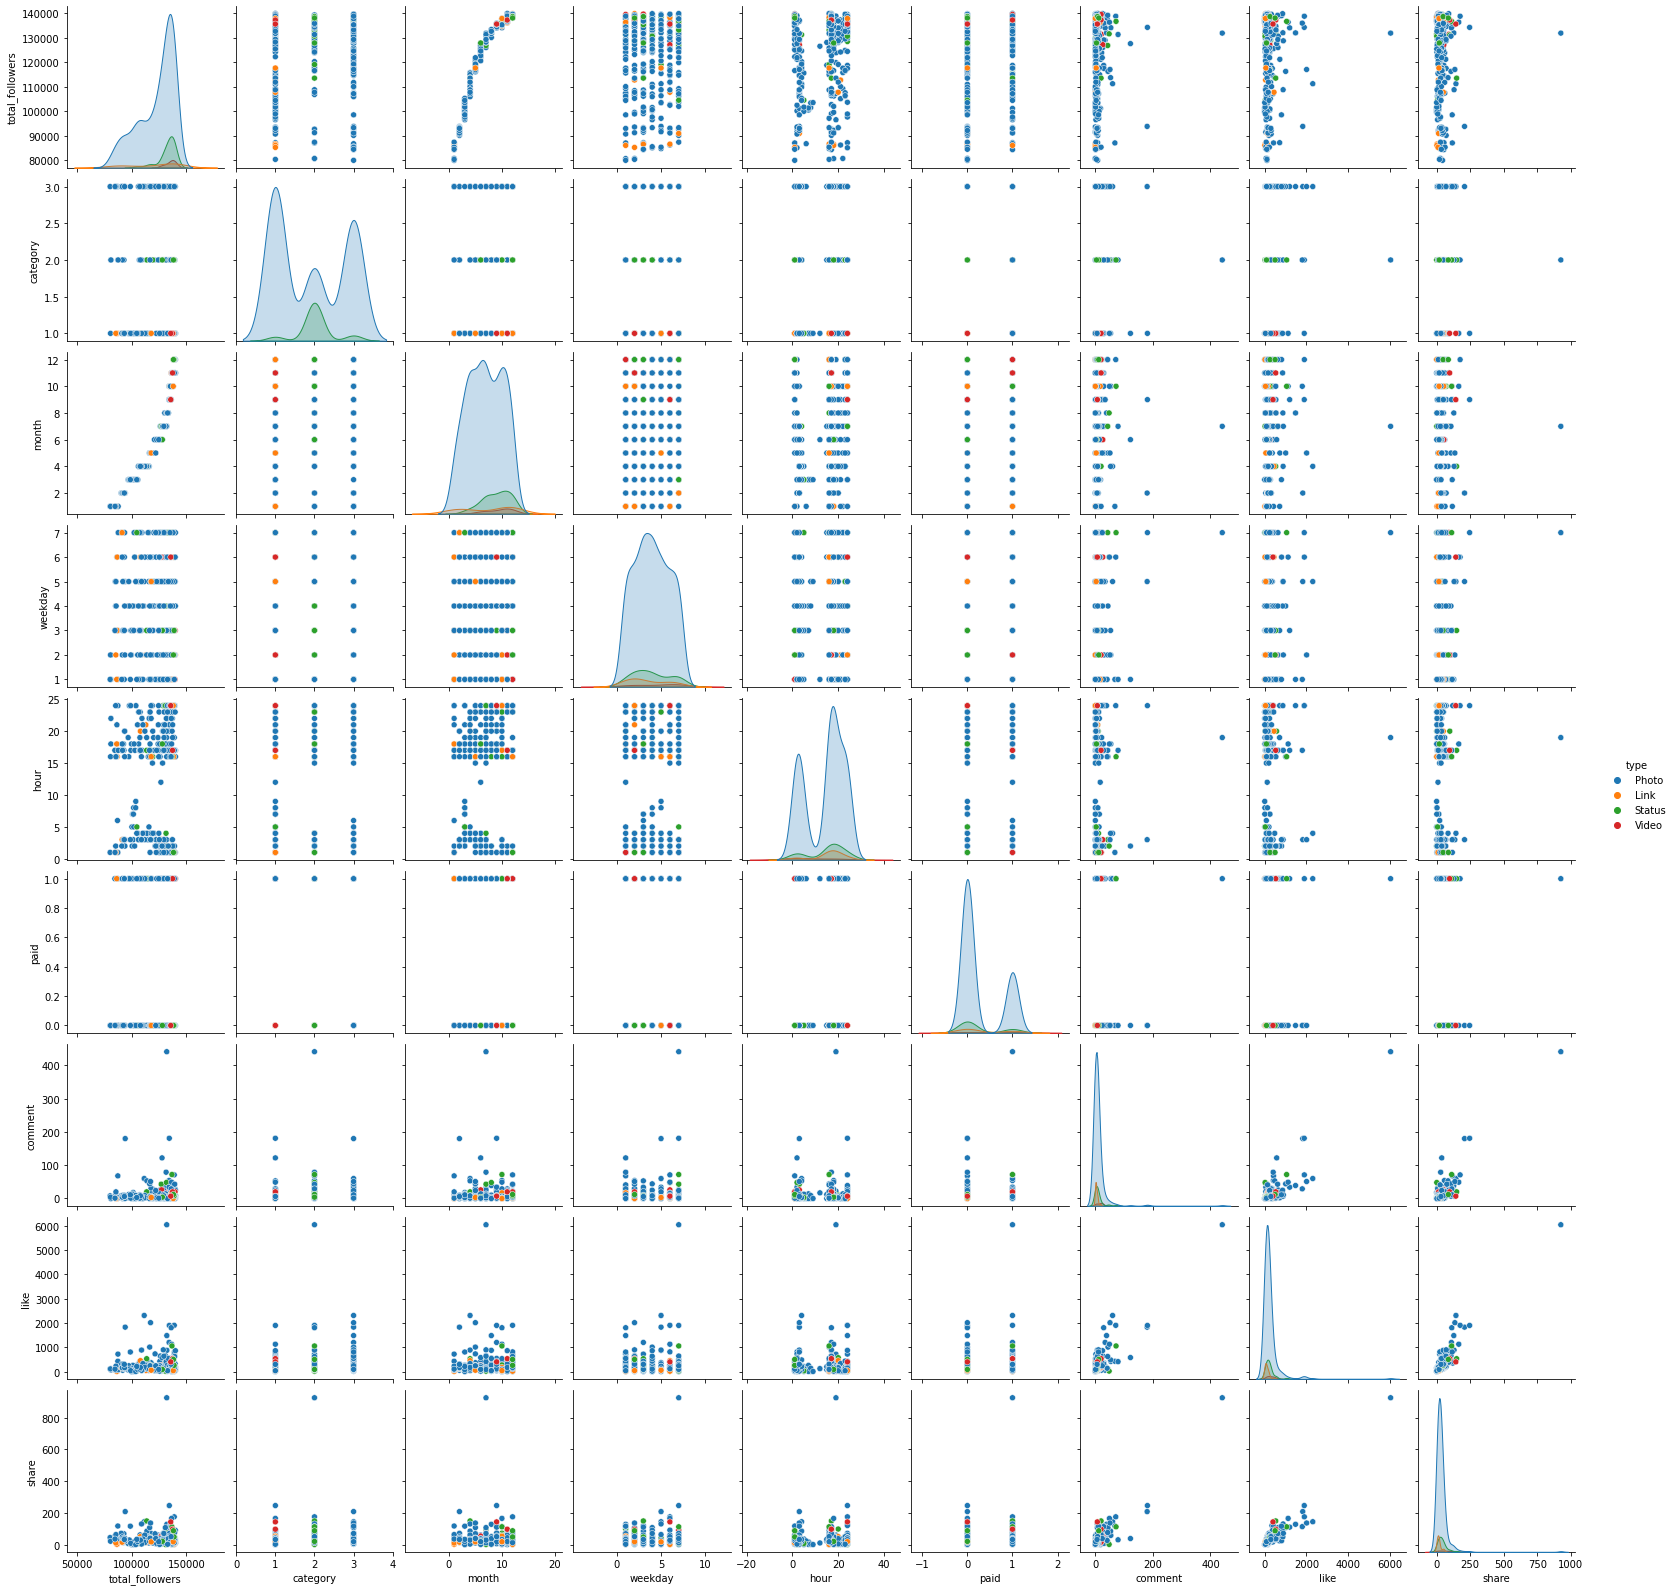

In [186]:
sns.pairplot(facebook,hue='type')

                 total_followers  category     month   weekday      hour  \
total_followers         1.000000 -0.052406  0.939937  0.045513  0.220996   
category               -0.052406  1.000000 -0.091847  0.003082  0.040973   
month                   0.939937 -0.091847  1.000000  0.036661  0.247478   
weekday                 0.045513  0.003082  0.036661  1.000000 -0.007532   
hour                    0.220996  0.040973  0.247478 -0.007532  1.000000   
paid                    0.016277 -0.019014 -0.012070 -0.102114  0.012701   
comment                 0.036038  0.021430  0.002549  0.054457 -0.011131   
like                    0.050584  0.125838  0.024139  0.026713  0.012157   
share                   0.009278  0.143065 -0.014715  0.054006  0.015808   

                     paid   comment      like     share  
total_followers  0.016277  0.036038  0.050584  0.009278  
category        -0.019014  0.021430  0.125838  0.143065  
month           -0.012070  0.002549  0.024139 -0.014715  
weekday

<AxesSubplot:>

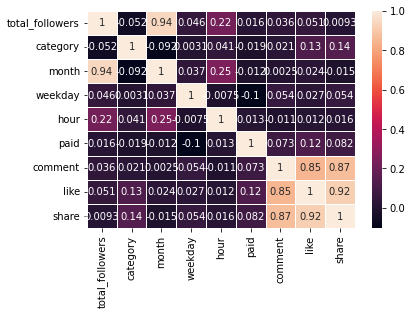

In [187]:
#Examine correlation
print(facebook.corr())
sns.heatmap(facebook.corr(),annot=True,lw=1)

Comment, like, share seems to be highly correlated. 

<AxesSubplot:xlabel='type', ylabel='comment'>

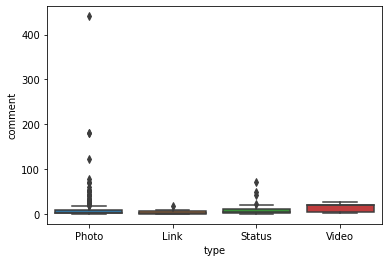

In [188]:
sns.boxplot(y='comment',x='type',data=facebook)

#### Engineer types into three dummy variables
- video: 11
- Photo: 10
- status: 01
- link: 00

In [189]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [190]:
#exclude comment, like, share columns
X = facebook.loc[:,  ~facebook.columns.isin(['comment', 'like', 'share'])]

#translate df to array 
X_type = X['type']
X = X.loc[:,  X.columns!= 'type']

print(X_type[0:10])
X.head()

0     Photo
1     Photo
2     Photo
3     Photo
4      Link
5     Photo
6     Photo
7    Status
8     Photo
9    Status
Name: type, dtype: object


,total_followers,category,month,weekday,hour,paid
0,124050,3,6,4,17,1
1,132556,2,8,3,24,0
2,92786,2,2,6,17,1
3,135632,1,9,2,1,0
4,139540,1,12,3,17,1


In [191]:
ohe = OneHotEncoder()
X_type = np.array(X_type).reshape(-1, 1)

X_type = pd.DataFrame(ohe.fit_transform(X_type).toarray(), columns=['Link', 'Photo', 'Status', 'Video'])
X_type

,Link,Photo,Status,Video
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
392,0.0,0.0,1.0,0.0
393,0.0,0.0,1.0,0.0
394,0.0,0.0,0.0,1.0
395,0.0,1.0,0.0,0.0


In [192]:
X = X.join(X_type)
X

,total_followers,category,month,weekday,hour,paid,Link,Photo,Status,Video
0,124050,3,6,4,17,1,0.0,1.0,0.0,0.0
1,132556,2,8,3,24,0,0.0,1.0,0.0,0.0
2,92786,2,2,6,17,1,0.0,1.0,0.0,0.0
3,135632,1,9,2,1,0,0.0,1.0,0.0,0.0
4,139540,1,12,3,17,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
392,138114,2,12,2,1,0,0.0,0.0,1.0,0.0
393,127937,2,6,3,18,0,0.0,0.0,1.0,0.0
394,135656,1,9,6,24,0,0.0,0.0,0.0,1.0
395,124663,3,6,3,16,1,0.0,1.0,0.0,0.0


### Linear Regression Modeling

In [193]:
from sklearn.model_selection import train_test_split
share = facebook['share']
X_train, X_test, y_train, y_test = train_test_split(X, share, test_size=0.2, random_state=0)

In [194]:
from sklearn.linear_model import LinearRegression
from numpy import array
import matplotlib as plt

model = LinearRegression()

model.fit(X_train, y_train)
model.coef_,model.intercept_,model.score(X, share)

(array([ 5.65568601e-04,  8.02210184e+00, -2.83685330e+00,  2.55238541e+00,
         2.48323633e-01,  1.16239845e+01, -1.47699533e+01, -4.73389810e+00,
        -7.07587097e-01,  2.02114385e+01]),
 -42.90512052099944,
 0.03863339838697322)

In [195]:
model.intercept_


-42.90512052099944

In [196]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter.loc['intercept', :] = model.intercept_
coeff_parameter

,Coefficient
total_followers,0.000566
category,8.022102
month,-2.836853
weekday,2.552385
hour,0.248324
paid,11.623984
Link,-14.769953
Photo,-4.733898
Status,-0.707587
Video,20.211439


### Predicting testset

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='share'>

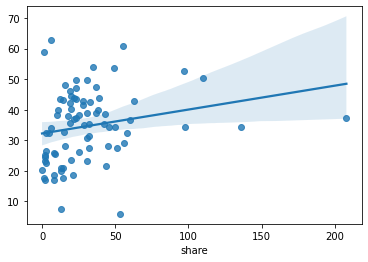

In [199]:
y_pred = model.predict(X_test)
sns.regplot(y_test,y_pred) #compare prediction and actual results 

From the graph, the prediction result doesn't seem to be accurate. In addition, standard errors of share doesn't seem to be constant. This indicate heteroskedasticity might exists.


## Model Evalutaion
### MSE

In [203]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
print('mean squared error is:', mean_squared_error(y_test, y_pred))
print('mean absolute error is:',mean_absolute_error(y_test, y_pred))
print('median absolute error is:',median_absolute_error(y_test, y_pred))

mean squared error is: 1012.8335362630936
mean absolute error is: 21.515317249096643
median absolute error is: 17.800778944730247


### R square

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  share   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.432
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.173
Time:                        10:50:15   Log-Likelihood:                -1737.0
No. Observations:                 317   AIC:                             3494.
Df Residuals:                     307   BIC:                             3532.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -34.3241     44.995     

R square is 0.04 and adjusted Rsquare is 0.012 indicates that our OLS model doesn't have much explanatory power. 

### Others: encoder understanding
Label encoder only turns the data into a list of ordinal values e.g.[1112213] while one hot encoder will change it into multiple dummy variables e.g. [[010][001][100]]
To perform the encoding, we will needs to reshape the data. 

#### to reshape the data
``` 
import numpy as np
cat = np.array(["cold","hot","warm"]).reshape(1,3) #format for onehotencoding 
cat_wrong = np.array(["cold","hot","warm"]) #wrong format
cat.shape, cat_wrong.shape
```

#### label encoder 
```
le = LabelEncoder()
X_type = le.fit_transform(X['type'])
print(X_type)
```

#### onehot encoder 
We will need to reshape the categorical column, one hot encode, make it a dataframe so we can piece it we are original dataset. 
```
ohe = OneHotEncoder()
X_type = np.array(X['type']).reshape(-1, 1)

X_type = pd.DataFrame(ohe.fit_transform(X_type).toarray(), columns=['Link', 'Photo', 'Status', 'Video'])
X_type
```
### Problem of One-Hot Encoding: Dummy Variable Trap
- Dummy Variable Trap is a scenario in which variables are highly correlated to each other.
- multicollinearity: Multicollinearity occurs where there is a dependency between the independent features. 

### When to use one hot encoding or label encoding? 

We apply One-Hot Encoding when:

- The categorical feature is not ordinal (like the countries above)
- The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

- The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption
